<a href="https://colab.research.google.com/github/AniB007/Unsupervised-Learning/blob/main/K%20Means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading wine dataset from SKlearn
wine = load_wine()

In [4]:
# Converting into pandas dataframe
data = pd.DataFrame(wine.data, columns = wine.feature_names)

In [5]:
# First look of Data
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
# sacling data fro transformation using Standard Sacler
scaler = StandardScaler()

wine_data = scaler.fit_transform(data)
wine_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
# Finding Cluster using range
clusters = []

for k in range(1,11):
  kmeans = KMeans(n_clusters = k, random_state=61).fit(wine_data)
  clusters.append(kmeans.inertia_)

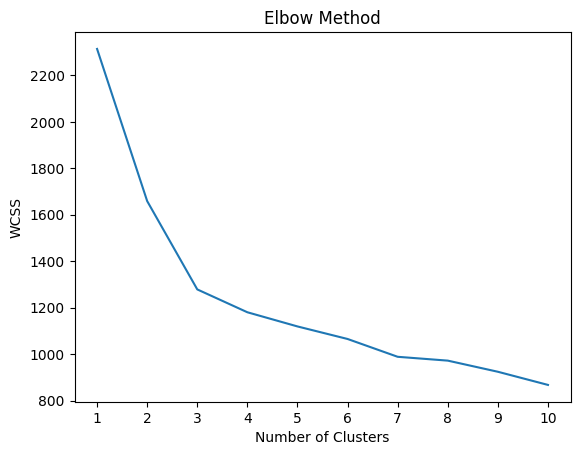

In [9]:
# Plotting using Elbow Method
plt.plot(range(1,11),clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.xticks(range(1,11))
plt.show()

In [25]:
# Modeling using Clustering K-Means algorithm
# Grouping data using mean aggregration
kmeans  = KMeans(n_clusters = 3,init = "k-means++",random_state =61)
cluster_labels = kmeans.fit_predict(wine_data)
data["Cluster"] = cluster_labels
df= data.groupby("Cluster").mean()

In [26]:
# Checking for difference in cluster
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Cluster,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


In [28]:
# Mapping data using cluster name
data['Cluster']= data['Cluster'].map({2:'Strong Wine Lover ',0:'Average Wine Lover',1:'Simple Wine Lover'})

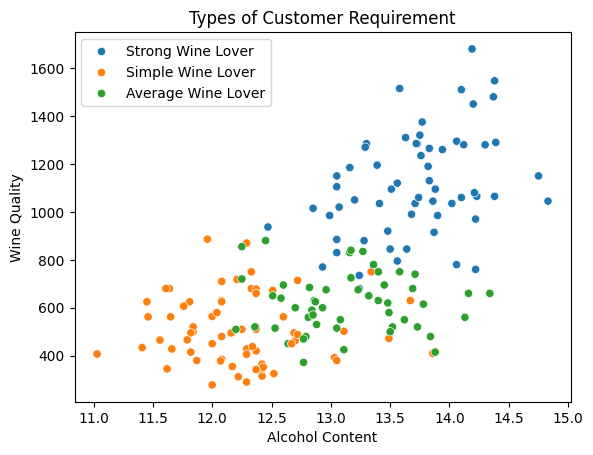

In [29]:
# Plotting the data for visual
sns.scatterplot(x="alcohol", y="proline", hue='Cluster', data = data)
plt.ylabel("Wine Quality")
plt.xlabel("Alcohol Content")
plt.title("Types of Customer Requirement")
plt.legend()
plt.grid(False)
plt.show()

# Conclusion

* Here Alcohol dataset from sklearn is used.
* The data was scaled using standard scaler.
* Cluster was determined by Within Sum of Squares method, at first then plotted using Elbow Method, there after 3 cluster the value dropped rapidly.
* Then using K-means model with no. of clusters as 3 model is fitted and predicted.
* After getting the cluster mean was done to find the average in 3 groups.
* So I have divided customer into three types Strong Wine Lover, Average Wine Lover & Simple Wine Lover based on Alcohol & Proline.
* High Content Proline & Alcohol means high falvour of Wine and aroma mostly liked by customer who drinks heavily.